In [1]:
from utils.pareto_set import ParetoSet, BiObjSolution
from random import randint, random
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

# Визуализация Парето-сета

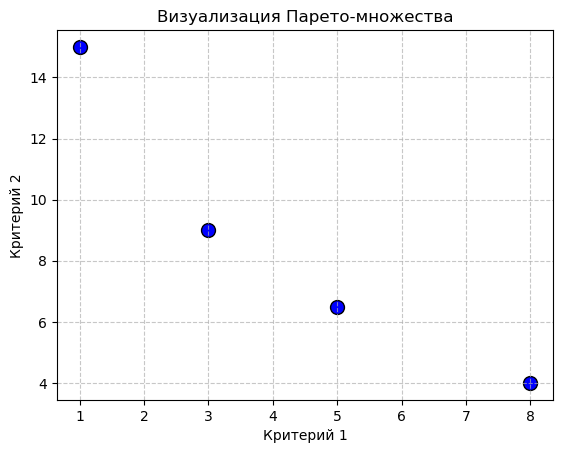

In [2]:
pareto_set = ParetoSet(BiObjSolution)
pareto_set.add_solution([1, 16])
pareto_set.add_solution([4, 10])
pareto_set.add_solution([2, 17])
pareto_set.add_solution([5, 8])
pareto_set.add_solution([6, 17])
pareto_set.add_solution([13, 4])
# тру решение
pareto_set.add_solution([1, 15])
pareto_set.add_solution([3, 9])
pareto_set.add_solution([5, 6.5])
pareto_set.add_solution([9, 4])
pareto_set.add_solution([8, 4])
pareto_set.visualize()


## Создание рандомного Парето-сета

In [3]:
def random_pareto_set(points_count) -> ParetoSet:
    pareto_set = ParetoSet(BiObjSolution)
    for _ in range(points_count):
        pareto_set.add_solution([randint(1, 20) + random(), randint(1, 20) + random(),  ])
    return pareto_set


pareto_set = random_pareto_set(100)

## Интерактивная визуализация

In [10]:
def visualize_interactive_pareto_set_changes(step):
    #TODO: добавить легенду
    
    # Размер окна графика
    plt.figure(figsize=(10, 6))

    if step == len(pareto_set.history):

        all_old_x, all_old_y = [], []
        for solution in pareto_set.all_solusions_ever:
            all_old_x.append(solution.g1)
            all_old_y.append(solution.g2)

        plt.scatter(list(all_old_x), list(all_old_y), label='Pareto Set', color='lightblue', marker='o', s=100, edgecolors='black')

        x_values, y_values = [], []
        for solution in pareto_set.solutions:
            x_values.append(solution.g1)
            y_values.append(solution.g2)
        plt.scatter(x_values, y_values, label='Pareto Set', color='blue', marker='o', s=100, edgecolors='black')

    else:
        if step > 1:
            previous_solutions = pareto_set.history[step - 1]
            x_values_previous, y_values_previous = [], []
            for solution in previous_solutions:
                x_values_previous.append(solution.g1)
                y_values_previous.append(solution.g2)
            plt.scatter(x_values_previous, y_values_previous, label=f'Step {step - 1} (previous)', color='lightblue', marker='o', s=100, edgecolors='black')
        current_solutions = pareto_set.history[step]
        x_values_current, y_values_current = [], []
        for solution in pareto_set.history[step]:
            x_values_current.append(solution.g1)
            y_values_current.append(solution.g2)
        plt.scatter(x_values_current, y_values_current, label=f'Step {step} (current)', color='blue', marker='o', s=100, edgecolors='black')

        
    plt.xlim(0, pareto_set.max_x + 2)
    plt.ylim(0, pareto_set.max_y + 2)
    # Настройка графика
    plt.xlabel('Критерий 1')
    plt.ylabel('Критерий 2')
    plt.title('Визуализация Парето-множества')

    # Включаем грид только для местоположений точек
    plt.grid(True, linestyle='--', which='both', alpha=0.7)

    # Показываем график
    plt.show()

interact(visualize_interactive_pareto_set_changes, step=widgets.IntSlider(min=1, max=len(pareto_set.history), value=1, description='Шаг'));

interactive(children=(IntSlider(value=1, description='Шаг', max=13, min=1), Output()), _dom_classes=('widget-i…